<a href="https://colab.research.google.com/github/daqichen/CIFAR10/blob/main/Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Model

The following model consists of 3 VGG blocks. It is trained over 100 epochs using the Adam optimizer. It achieves a prediction accuracy of 75.64% on the validation set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [ ]:
def data_loader(test=False):
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # normalize x values
  trainX, testX = trainX.astype('float32')/255.0, testX.astype('float32')/255.0
  # one hot encode y values
  trainY, testY = to_categorical(trainY), to_categorical(testY)
  if (test):
    # return train set and test set
    return trainX, trainY, testX, testY
  else:
    # randomly sample 20% of data from train set
    mask_indices = np.random.choice(np.arange(trainX.shape[0]), size=int(trainX.shape[0] * 0.2), replace=False)
    mask_arr = np.zeros(trainX.shape[0])
    mask_arr[mask_indices] = 1
    # create validation set using random sample
    valX, valY = trainX[mask_arr == 1], trainY[mask_arr == 1]
    # remove random sample from train set
    trainX, trainY = trainX[mask_arr == 0], trainY[mask_arr == 0]
    # return train set and validation set
    return trainX, trainY, valX, valY

In [ ]:
# define ConvNet model
def model(optimizer=Adam(), loss='categorical_crossentropy'):
  # initialize model
  model = Sequential()
  # add layers to model
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  return model

In [ ]:
# display training metrics and plot learning curves
def training_summary(history, loss, accuracy, test=False):
  # define x-axis of plots
  epochs = np.arange(len(history.history['loss'])) + 1
  # determine if evaluating performance on test set or validation set
  label = 'test' if test else 'validation'
  plt.figure(figsize=(15,30))
  # plot losses
  plt.subplot(621)
  plt.tight_layout()
  plt.title('Cross-Entropy Loss', fontsize=16)
  plt.xlabel('Epoch', fontsize=14)
  plt.ylabel('Loss', fontsize=14)
  plt.plot(epochs, history.history['loss'], color='blue', label='train')
  plt.plot(epochs, history.history['val_loss'], color='orange', label=label)
  plt.legend(loc='upper left')
  # plot accuracies
  plt.subplot(622)
  plt.tight_layout()
  plt.title('Classification Accuracy', fontsize=16)
  plt.xlabel('Epoch', fontsize=14)
  plt.ylabel('Accuracy', fontsize=14)
  plt.plot(epochs, history.history['accuracy'], color='blue', label='train')
  plt.plot(epochs, history.history['val_accuracy'], color='orange', label=label)
  plt.legend(loc='upper left')
  # print final loss and accuracy
  print(f'{label} loss: {loss:.3f} - {label} accuracy: {accuracy:.3f}')

In [ ]:
def predict(model, examples, label_map, transform=lambda x: (255*x).astype('uint8')):
  # make predictions based on example data
  predictions = [label_map[np.argmax(prediction)] for prediction in model.predict(examples)]
  # denormalize image data
  examples = transform(examples)
  for i in range(len(predictions)):
    plt.subplot(6,2,i+3)
    plt.tight_layout()
    # remove axis labels and ticks
    ax = plt.gca().axes
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    # display prediction
    plt.xlabel(predictions[i], fontsize=16)
    # display image
    plt.imshow(examples[i])

In [ ]:
# train the model and evaluate its performance
def train(data_loader, model, optimizer=Adam(), loss='categorical_crossentropy', epochs=100, batch_size=64, test=False, verbose=False):
  # load dataset
  trainX, trainY, valX, valY = data_loader(test=test)
  # define model
  model = model(optimizer=optimizer, loss=loss)
  # fit model
  history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=verbose)
  # evaluate model
  loss, acc = model.evaluate(valX, valY)
  # summarize training
  training_summary(history, loss, acc, test=test)
  # make predictions
  label_map = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
  predict(model, valX[:10], label_map)

313/313 [==============================] - 2s 7ms/step - loss: 2.1614 - accuracy: 0.7564
validation loss: 2.161 - validation accuracy: 0.756


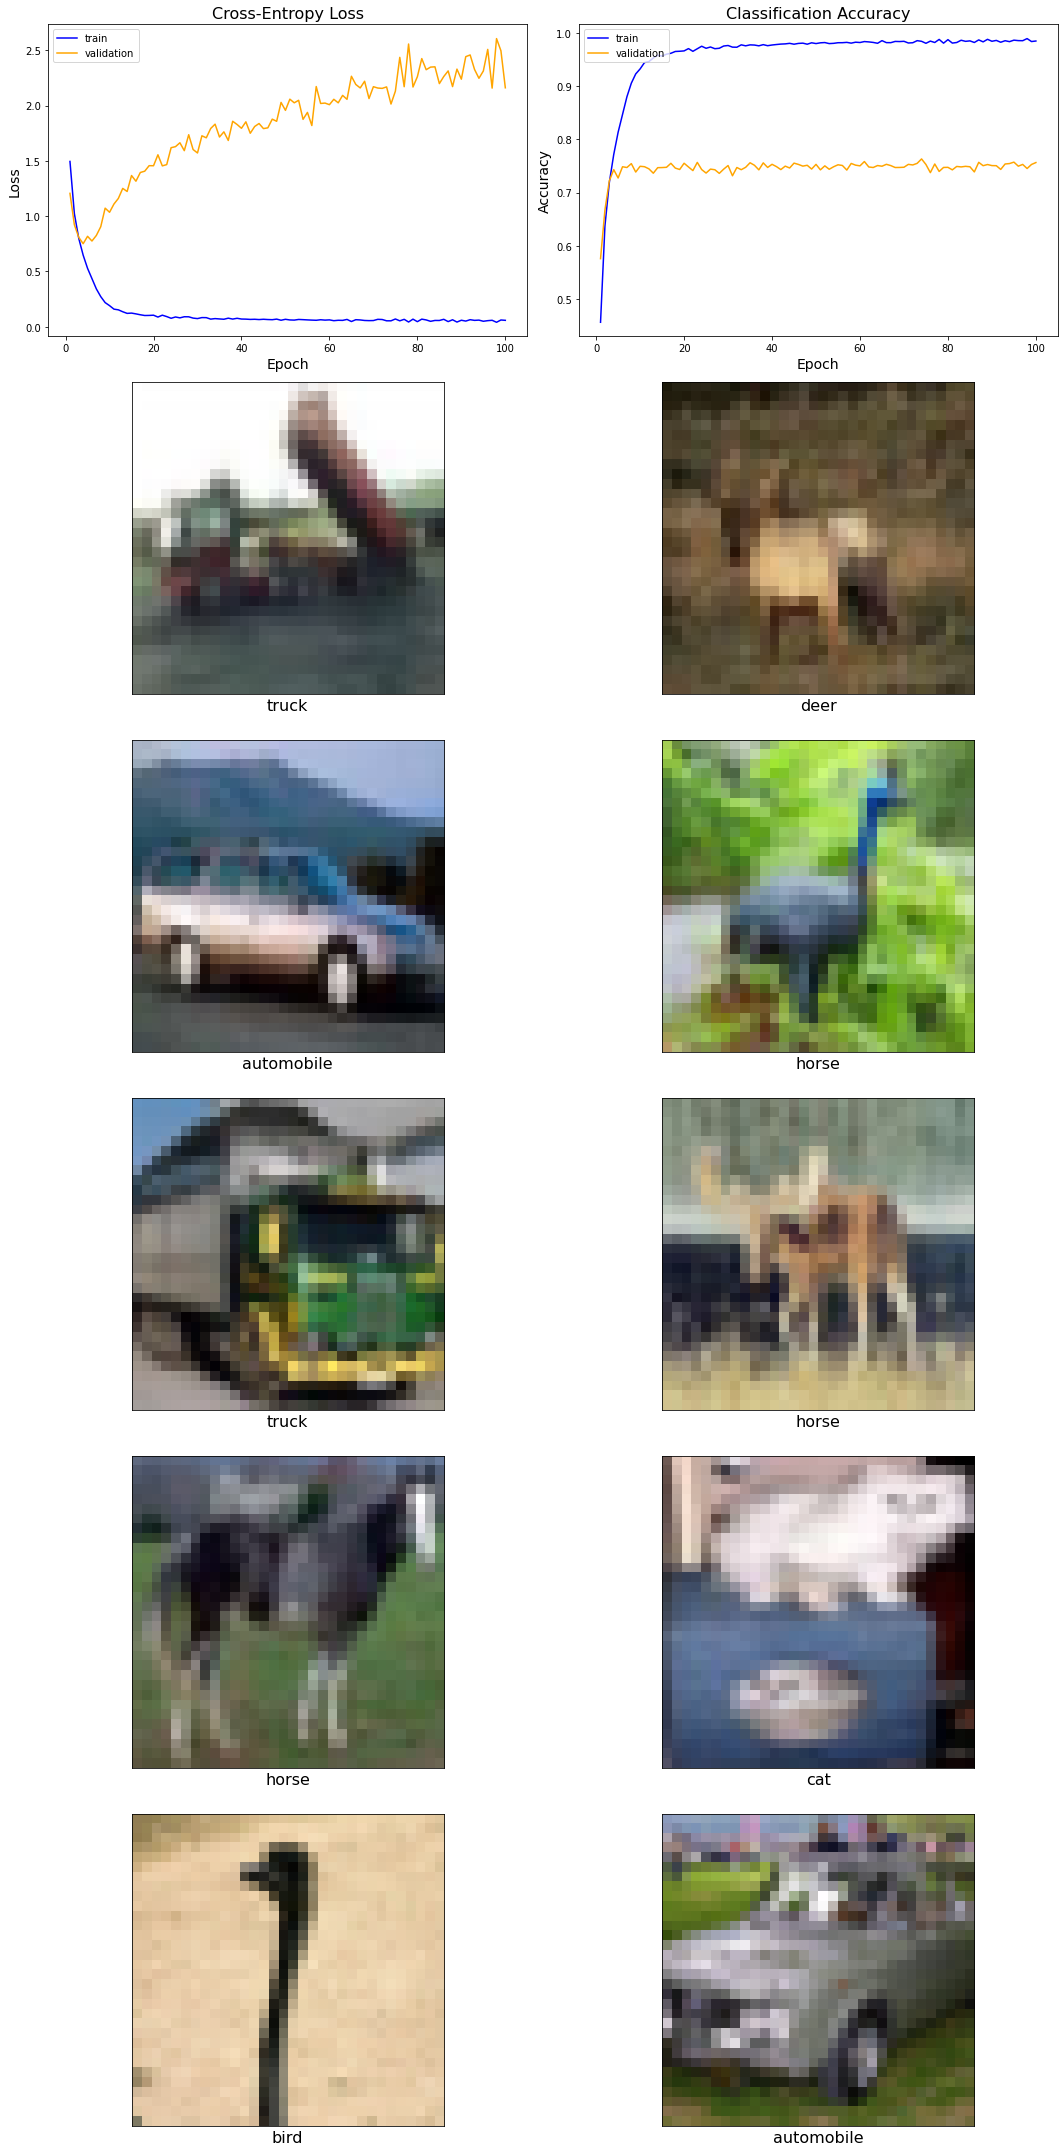

In [ ]:
train(data_loader=data_loader, model=model)